<a href="https://colab.research.google.com/github/AfrinaldiLibrary/pembelajaran_mesin/blob/main/UTS_Pembelajaran_Mesin_Afrinaldi_1197050007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin

AFRINALDI 1197050007 D

# Topik Mini Riset

Mini Riset ini mengenai prediksi tier pada champion dalam game league of legends menggunakan metode klassifikasi dengan algoritma KNN

# Business Understanding 

Objektif Bisnis
- Latar Belakang

League of Legends adalah game MOBA dengan gameplay arena pertempuran 5v5. Dimana di dalamnya kita dapat memilih hero atau disini kita menyebutnya sebagai champion untuk bertarung melawan orang lain. Pada game ini terdapat role untuk masing masing tiap champion yang dimana biasanya role ini ditentukan oleh pemain itu sendiri. Seiring dengan banyaknya penambahan champion ini membuat komposisi untuk setiap champion menjadi berubah yang mana ini berdampak pada tingkatan tier untuk tiap champion.

- Identifikasi Masalah

Jadi dari latar belakang diatas dapat disimpulkan identifikasi masalahnya adalah bagaimana kita menentukan peringkat tier untuk setiap champion agar dapat mempertimbangkan champion mana yang akan digunakan pada pertempuran.

- Metode/ Pendekatan Penyelesaian Masalah

Metode penyelesaian masalah yang digunakan adalah dengan metode klasifikasi menggunakan algoritma KNN

- Tujuan Teknis dan Kriteria Kesuksesan

Memprediksi tier dari champion, kriteria kesuksesannya dapat memilih champion mana yang cocok untuk digunakan pada saat pertempuran

- Timeline Mini Riset
1. membuat business understanding
2. mencari dataset
3. melakukan pengkodean

# Data Understanding

Disini dataset diambil dari kaggle. Dataset yang digunakan memiliki +100 rows dan 11 columns. Penjelasan dari setiap kolom sebagai berikut:-

> ini rincian atribut/fitur/independent variable/kriteria:

1. Name : Name dari champion
2. Class : Fighter, Assassin, Mage, Marksman, Support atau Tank
3. Role : Top, Mid, ADC, Support atau Jungle
4. Score : score keseluruhan dari champion
5. Trend : Trend dari score
6. Win % : Win rate dari champion
7. Role % : Role rate dari champion yang dimainkan
8. Pick % : Pick rate dari champion
9. Ban % : Ban rate dari champion
10. KDA : (Kill+Death)/Assist dari champion

column 1 (Name) tidak dilibatkan karena uniq.

> ini variabel target/dependet variable/class/label

Tier:- Tingkat rank dari champion yaitu God, S, A, B, C atau D.

# Data Preparation


In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# load data

data = pd.read_csv('https://raw.githubusercontent.com/AfrinaldiLibrary/pembelajaran_mesin/main/League%20of%20Legends%20Champion%20Stats%2012.2.csv', sep =';')

data

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,55.11,-3.14,48.97%,94.09%,4.33%,1.97%,1.92
1,Ahri,Mage,MID,A,55.85,2.64,50.71%,93.24%,4.56%,1.04%,2.55
2,Akali,Assassin,TOP,God,87.73,29.87,49.70%,44.38%,6.19%,21.71%,2.13
3,Akali,Assassin,MID,S,74.58,9.28,49.85%,55.40%,8.26%,21.71%,2.42
4,Akshan,Marksman,MID,S,63.49,3.64,51.94%,59.70%,4.86%,23.10%,2.28
...,...,...,...,...,...,...,...,...,...,...,...
229,Ziggs,Mage,ADC,B,41.15,-2.48,52.23%,63.47%,1.89%,0.46%,2.58
230,Zilean,Support,MID,A,53.06,0.86,53.20%,21.93%,0.98%,2.00%,3.47
231,Zilean,Support,SUPPORT,A,47.14,-2.30,50.10%,73.12%,3.37%,2.00%,3.12
232,Zoe,Mage,MID,A,47.71,-2.06,49.43%,94.46%,3.05%,1.17%,2.56


In [101]:
data.shape

(234, 11)

In [102]:
data.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    234 non-null    object 
 1   Class   234 non-null    object 
 2   Role    234 non-null    object 
 3   Tier    234 non-null    object 
 4   Score   234 non-null    float64
 5   Trend   234 non-null    float64
 6   Win %   234 non-null    object 
 7   Role %  234 non-null    object 
 8   Pick %  234 non-null    object 
 9   Ban %   234 non-null    object 
 10  KDA     234 non-null    float64
dtypes: float64(3), object(8)
memory usage: 20.2+ KB


In [104]:
# set independent variable/attribute/predictor/feature
X = data.drop(columns = ['Tier', 'Name'], axis = 1)
 
# set dependent variable/clas/target/label
y = data['Tier']

In [105]:
# ini jadinya X

X

,Class,Role,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Fighter,TOP,55.11,-3.14,48.97%,94.09%,4.33%,1.97%,1.92
1,Mage,MID,55.85,2.64,50.71%,93.24%,4.56%,1.04%,2.55
2,Assassin,TOP,87.73,29.87,49.70%,44.38%,6.19%,21.71%,2.13
3,Assassin,MID,74.58,9.28,49.85%,55.40%,8.26%,21.71%,2.42
4,Marksman,MID,63.49,3.64,51.94%,59.70%,4.86%,23.10%,2.28
...,...,...,...,...,...,...,...,...,...
229,Mage,ADC,41.15,-2.48,52.23%,63.47%,1.89%,0.46%,2.58
230,Support,MID,53.06,0.86,53.20%,21.93%,0.98%,2.00%,3.47
231,Support,SUPPORT,47.14,-2.30,50.10%,73.12%,3.37%,2.00%,3.12
232,Mage,MID,47.71,-2.06,49.43%,94.46%,3.05%,1.17%,2.56


In [106]:
# yang ini Y nya

y

0        A
1        A
2      God
3        S
4        S
      ... 
229      B
230      A
231      A
232      A
233      A
Name: Tier, Length: 234, dtype: object

In [107]:
#Memisahkan data menjadi String dan Non string

a = X.iloc[:,[0,1,4,5,6,7]]
b = X.iloc[:,[2,3,8]]

In [108]:
#Mengubah menjadi data numeric menggunakan label Encoding pada string
a_enc = a.copy()
for col in a.columns:
    lb = LabelEncoder()
    a_enc[col] = lb.fit_transform(a[col].values)

a_enc

,Class,Role,Win %,Role %,Pick %,Ban %
0,1,4,56,179,152,52
1,2,2,133,172,157,39
2,0,4,86,74,180,101
3,0,2,91,81,201,101
4,3,2,177,87,163,103
...,...,...,...,...,...,...
229,2,0,183,94,65,19
230,4,2,196,45,35,82
231,4,3,100,106,128,82
232,2,2,76,182,118,41


In [109]:
#Menggabungkan data untuk nilai string dan nilai numeric

X = pd.concat([b, a_enc], axis = 1)
X

,Score,Trend,KDA,Class,Role,Win %,Role %,Pick %,Ban %
0,55.11,-3.14,1.92,1,4,56,179,152,52
1,55.85,2.64,2.55,2,2,133,172,157,39
2,87.73,29.87,2.13,0,4,86,74,180,101
3,74.58,9.28,2.42,0,2,91,81,201,101
4,63.49,3.64,2.28,3,2,177,87,163,103
...,...,...,...,...,...,...,...,...,...
229,41.15,-2.48,2.58,2,0,183,94,65,19
230,53.06,0.86,3.47,4,2,196,45,35,82
231,47.14,-2.30,3.12,4,3,100,106,128,82
232,47.71,-2.06,2.56,2,2,76,182,118,41


# Modeling

Membahas mengenai proses Fiting Model, set parameter-parameter dll.

In [110]:
# testing 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [111]:
#Fungsi model evaluasi
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

In [112]:
#Melakukan perulangan untuk mendapatkan nilai terbaik pada 'k'
scores = []
for k in range(2,30):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores, end = ' ')

[0.574468085106383, 0.6808510638297872, 0.6595744680851063, 0.6170212765957447, 0.6382978723404256, 0.5957446808510638, 0.574468085106383, 0.574468085106383, 0.5106382978723404, 0.5531914893617021, 0.5957446808510638, 0.6382978723404256, 0.6382978723404256, 0.574468085106383, 0.574468085106383, 0.574468085106383, 0.5531914893617021, 0.5957446808510638, 0.574468085106383, 0.6170212765957447, 0.5957446808510638, 0.6170212765957447, 0.6382978723404256, 0.6170212765957447, 0.5957446808510638, 0.6170212765957447, 0.5957446808510638, 0.6170212765957447] 

# Evaluasi

Membahas mengenai hasil pengujian terhadap model.

In [113]:
final_knn = KNeighborsClassifier(n_neighbors = 6, metric = 'manhattan').fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

In [114]:
# Menampilkan skor data training
final_knn.score(X_train, y_train)

0.7272727272727273

In [115]:
# Menampilkan skor akurasi prediksi
final_knn.score(X_test, y_test)

0.723404255319149

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.83      0.91      0.87        11
           B       0.64      0.75      0.69        12
           C       0.60      0.38      0.46         8
           D       0.83      1.00      0.91         5
         God       0.50      1.00      0.67         3
           S       1.00      0.50      0.67         8

    accuracy                           0.72        47
   macro avg       0.73      0.76      0.71        47
weighted avg       0.75      0.72      0.71        47



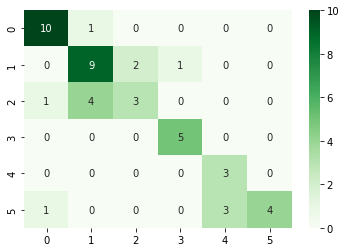

In [117]:
model_evaluation(final_knn)